In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
frame = pd.read_csv('calcular.csv')

In [3]:
frame

,X,Y
0,70,155
1,63,150
2,72,180
3,60,135
4,66,156
5,70,168
6,74,178
7,65,160
8,62,132
9,67,145


In [4]:
#recebe o total de valores da coluna de dados.
size = frame.shape[0]

In [5]:
#Obtendo Xbarra e Ybarra
mediaX = frame['X'].sum()/size
mediaY = frame['Y'].sum()/size

In [7]:
#completa a Tabela (Xi – Xbarra) e (Yi – Ybarra)
#Com os valores onde Xi -> É o valor atual da linha
#E Xbarra é a média dos valores
#Os códigos seguintes são a definição para resoulção da tabela
for cont in range(size):
    frame.loc[cont,'(Xi – Xbarra)'] = frame.loc[cont,'X'] - mediaX
    frame.loc[cont,'(Yi – Ybarra)'] = frame.loc[cont,'Y'] - mediaY
    frame.loc[cont,'(Xi – Xbarra)*(Yi – Ybarra)'] = frame.loc[cont,'(Xi – Xbarra)'] * frame.loc[cont,'(Yi – Ybarra)']
    frame.loc[cont,'(Xi – Xbarra)²'] = frame.loc[cont,'(Xi – Xbarra)'] ** 2
    frame.loc[cont,'(Yi – Ybarra)²'] = frame.loc[cont,'(Yi – Ybarra)'] ** 2
    frame.loc[cont,'(Xi – Xbarra)² * (Yi – Ybarra)²'] = frame.loc[cont,'(Xi – Xbarra)²'] * frame.loc[cont,'(Yi – Ybarra)²']

In [8]:
#Soma dos resultado das tabelas para calcular a Correlação da reta
somaXxY = frame['(Xi – Xbarra)*(Yi – Ybarra)'].sum()
somaX2  = frame['(Xi – Xbarra)²'].sum()
somaY2  = frame['(Yi – Ybarra)²'].sum()
X2xY2   = somaX2 * somaY2

In [9]:
#impressão dos valores e suas somas 
print('Soma do total (Xi – Xbarra)*(Yi – Ybarra)     : ',(somaXxY))
print('Soma do total (Xi – Xbarra)²                  : ',(somaX2))
print('Soma do total (Yi – Ybarra)²                  : ',(somaY2))
print('Soma do total (Yi – Ybarra)²                  : ',(somaY2))
print('Soma do total (Xi – Xbarra)² * (Yi – Ybarra)² : ',(X2xY2))

Soma do total (Xi – Xbarra)*(Yi – Ybarra)     :  616.3333333333333
Soma do total (Xi – Xbarra)²                  :  191.66666666666663
Soma do total (Yi – Ybarra)²                  :  2659.666666666667
Soma do total (Yi – Ybarra)²                  :  2659.666666666667
Soma do total (Xi – Xbarra)² * (Yi – Ybarra)² :  509769.4444444444


In [10]:
#Calculo da Correlação da Reta e sua impressão
Corr = somaXxY / math.sqrt(X2xY2)
print('Correlação da reta é: ', (Corr))

Correlação da reta é:  0.863234434919584


In [11]:
#Insere a soma para fazer a correlação na tabela CSV
frame.loc[size+1,'(Xi – Xbarra)*(Yi – Ybarra)'] = somaXxY
frame.loc[size+1,'(Xi – Xbarra)²'] = somaX2
frame.loc[size+1,'(Yi – Ybarra)²'] = somaY2
frame.loc[size+1,'(Xi – Xbarra)² * (Yi – Ybarra)²'] = X2xY2
frame.loc[size+1,'Correlação'] = Corr

In [13]:
frame

,X,Y,(Xi – Xbarra),(Yi – Ybarra),(Xi – Xbarra)*(Yi – Ybarra),(Xi – Xbarra)²,(Yi – Ybarra)²,(Xi – Xbarra)² * (Yi – Ybarra)²,Correlação
0,70.0,155.0,3.166667,0.833333,2.638889,10.027778,0.694444,6.963735,NaN
1,63.0,150.0,-3.833333,-4.166667,15.972222,14.694444,17.361111,255.111883,NaN
2,72.0,180.0,5.166667,25.833333,133.472222,26.694444,667.361111,17814.834105,NaN
3,60.0,135.0,-6.833333,-19.166667,130.972222,46.694444,367.361111,17153.722994,NaN
4,66.0,156.0,-0.833333,1.833333,-1.527778,0.694444,3.361111,2.334105,NaN
5,70.0,168.0,3.166667,13.833333,43.805556,10.027778,191.361111,1918.926698,NaN
6,74.0,178.0,7.166667,23.833333,170.805556,51.361111,568.027778,29174.537809,NaN
7,65.0,160.0,-1.833333,5.833333,-10.694444,3.361111,34.027778,114.371142,NaN
8,62.0,132.0,-4.833333,-22.166667,107.138889,23.361111,491.361111,11478.741512,NaN
9,67.0,145.0,0.166667,-9.166667,-1.527778,0.027778,84.027778,2.334105,NaN


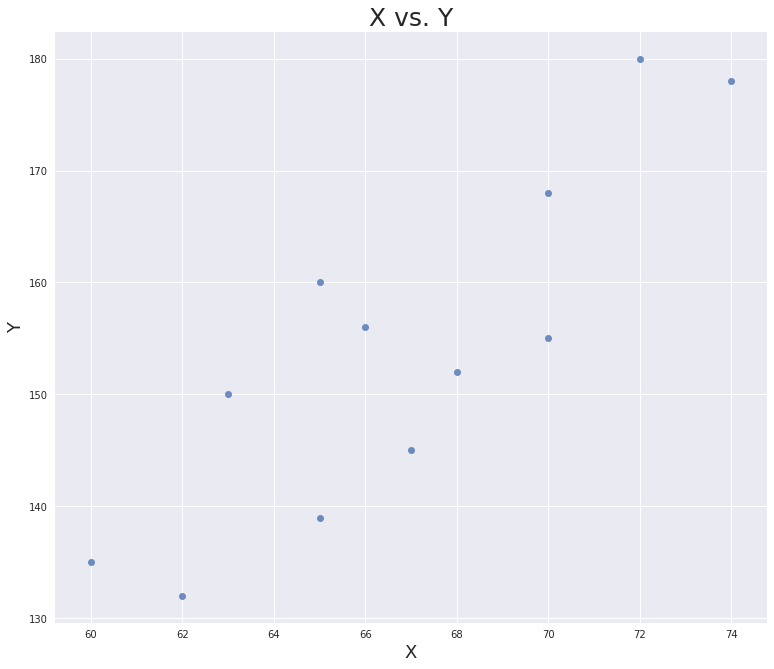

In [14]:
sb.set()
AttvTot = sb.lmplot(x='X', y='Y',data=frame,
                   fit_reg = False, size = 9, aspect = 1.2) #Can Add Hue to distinguish types
plt.ylim()
plt.xlim()
plt.title('X vs. Y',fontsize = 25)
plt.xlabel('X',fontsize = 18)
plt.ylabel('Y',fontsize = 18)
AttvTot.savefig("image.png")

In [15]:
frame.to_csv('solucao.csv')